<a href="https://colab.research.google.com/github/Koiria/A/blob/main/Copy_of_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Skills Lab

Materials:

- Download the January 2023 Yellow Taxi Data PARQUET file https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page
- Download the Taxi Zone Lookup table CSV file on the same page
- Read the Yellow Taxi data dictionary https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf

*Assignment:*

Use pandas to read the 2 data files into your Python notebook. Answer the following questions and upload your results here:

Tips: there are 3 airports, JFK, LaGuardia, and Newark (EWR)

1. Answer the following questions:

- How many pickups happened at each airport?
- How many dropoffs happened at each airport?
- What is the total amount of airport fees collected at each NYC airport? (JFK and LaGuardia)
- What borough destination had the most tips?
- What were the top 10 pickup locations by number of passengers?

2. Create a data visualization of your choice

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
taxi_link = (
    "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2024-01.parquet"
)
zone_link = "https://d37ci6vzurychx.cloudfront.net/misc/taxi_zone_lookup.csv"

trips = pd.read_parquet(taxi_link, engine="pyarrow")
taxi_zones = pd.read_csv(zone_link)

In [ ]:
trips.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2024-01-01 00:46:55,2024-01-01 00:58:25,N,1.0,236,239,1.0,1.98,12.8,1.0,0.5,3.61,0.0,NaN,1.0,21.66,1.0,1.0,2.75
1,2,2024-01-01 00:31:42,2024-01-01 00:52:34,N,1.0,65,170,5.0,6.54,30.3,1.0,0.5,7.11,0.0,NaN,1.0,42.66,1.0,1.0,2.75
2,2,2024-01-01 00:30:21,2024-01-01 00:49:23,N,1.0,74,262,1.0,3.08,19.8,1.0,0.5,3.00,0.0,NaN,1.0,28.05,1.0,1.0,2.75
3,1,2024-01-01 00:30:20,2024-01-01 00:42:12,N,1.0,74,116,1.0,2.40,14.2,1.0,1.5,0.00,0.0,NaN,1.0,16.70,2.0,1.0,0.00
4,2,2024-01-01 00:32:38,2024-01-01 00:43:37,N,1.0,74,243,1.0,5.14,22.6,1.0,0.5,6.28,0.0,NaN,1.0,31.38,1.0,1.0,0.00


In [ ]:
trips["pickup_day"] = trips["tpep_pickup_datetime"].apply(lambda x: x.day)
trips["pickup_dow"] = trips["tpep_pickup_datetime"].apply(lambda x: x.day_name())
trips["pickup_dow_num"] = trips["tpep_pickup_datetime"].apply(lambda x: x.day_of_week)

KeyError: 'tpep_pickup_datetime'

In [ ]:
taxi_zones.head()
airport_list = [1, 132, 138]
airport_zones = taxi_zones.query("LocationID in @airport_list")

In [ ]:
# rows before 3066766
trips_merged_pu = trips.merge(
    taxi_zones, left_on=["PULocationID"], right_on=["LocationID"], how="inner"
)

In [ ]:
trips_merged_pu.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,LocationID,Borough,Zone,service_zone
0,2,2024-01-01 00:46:55,2024-01-01 00:58:25,N,1.0,236,239,1.0,1.98,12.8,...,NaN,1.0,21.66,1.0,1.0,2.75,236,Manhattan,Upper East Side North,Yellow Zone
1,1,2024-01-01 09:48:47,2024-01-01 09:53:02,N,1.0,236,75,1.0,0.60,6.5,...,NaN,1.0,8.00,2.0,1.0,0.00,236,Manhattan,Upper East Side North,Yellow Zone
2,2,2024-01-01 11:53:45,2024-01-01 11:58:28,N,1.0,236,74,1.0,1.69,9.3,...,NaN,1.0,12.30,1.0,1.0,0.00,236,Manhattan,Upper East Side North,Yellow Zone
3,2,2024-01-01 12:52:11,2024-01-01 12:59:30,N,1.0,236,237,1.0,1.50,10.0,...,NaN,1.0,15.67,1.0,1.0,2.75,236,Manhattan,Upper East Side North,Yellow Zone
4,1,2024-01-01 13:49:53,2024-01-01 14:01:47,N,1.0,236,237,2.0,2.00,12.8,...,NaN,1.0,18.24,1.0,1.0,2.75,236,Manhattan,Upper East Side North,Yellow Zone


In [ ]:
trips_merged_pu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56551 entries, 0 to 56550
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               56551 non-null  int32         
 1   lpep_pickup_datetime   56551 non-null  datetime64[us]
 2   lpep_dropoff_datetime  56551 non-null  datetime64[us]
 3   store_and_fwd_flag     53136 non-null  object        
 4   RatecodeID             53136 non-null  float64       
 5   PULocationID           56551 non-null  int32         
 6   DOLocationID           56551 non-null  int32         
 7   passenger_count        53136 non-null  float64       
 8   trip_distance          56551 non-null  float64       
 9   fare_amount            56551 non-null  float64       
 10  extra                  56551 non-null  float64       
 11  mta_tax                56551 non-null  float64       
 12  tip_amount             56551 non-null  float64       
 13  t

In [ ]:
# 1 - How many pickups happened at each airport?
result_1 = (
    trips_merged_pu.query("PULocationID in @airport_list")
    .groupby(["Zone"])
    .agg({"Zone": "count", "passenger_count": "sum"})
)
result_1.columns = ["pickup_count", "passenger_count"]
result_1.reset_index(inplace=True)

In [ ]:
result_1

,Zone,pickup_count,passenger_count
0,JFK Airport,24,33.0
1,LaGuardia Airport,31,43.0
2,Newark Airport,3,4.0


<Axes: xlabel='Zone', ylabel='pickup_count'>

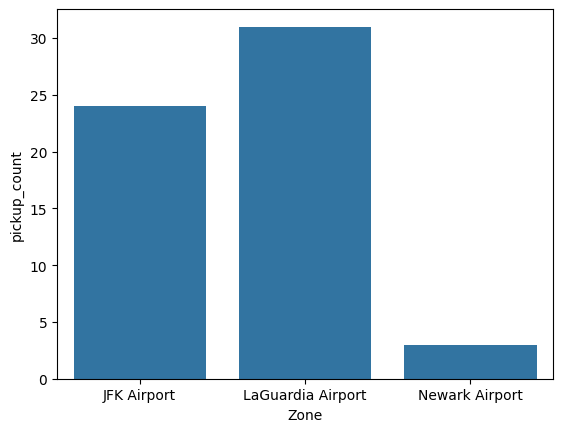

In [ ]:
sns.barplot(result_1, x="Zone", y="pickup_count")

In [ ]:
# 2 - How many dropoffs happened at each airport?
trips_merged_do = trips.merge(
    taxi_zones.query("LocationID in @airport_list"),
    left_on=["DOLocationID"],
    right_on=["LocationID"],
    how="inner",
)

In [ ]:
trips_merged_do.shape

(1756, 24)

In [ ]:
result_2 = trips_merged_do.groupby(["Zone"]).agg(
    {"Zone": "count", "passenger_count": "sum"}
)
result_2.columns = ["dropoff_count", "passenger_count"]
result_2.reset_index(inplace=True)

In [ ]:
result_2

,Zone,dropoff_count,passenger_count
0,JFK Airport,453,493.0
1,LaGuardia Airport,1279,1915.0
2,Newark Airport,24,20.0


<Axes: xlabel='Zone', ylabel='dropoff_count'>

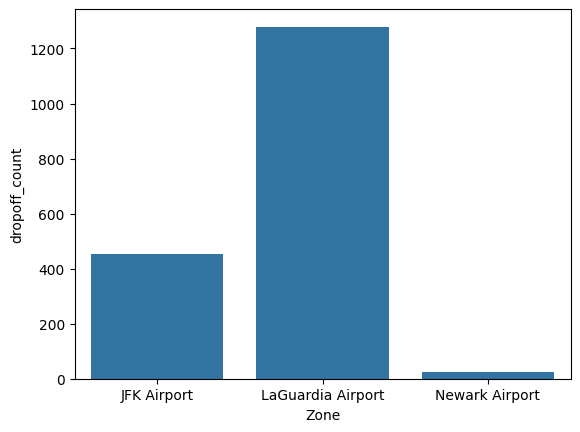

In [ ]:
sns.barplot(result_2, x="Zone", y="dropoff_count")

In [ ]:
# 3 - What is the total amount of airport fees collected at each NYC airport? (JFK and LaGuardia)
result_3 = (
    trips.query("PULocationID in @airport_list")
    .groupby("PULocationID")
    .agg({"airport_fee": "sum", "PULocationID": "count"})
)
result_3.columns = ["airport_fee_sum", "pickup_count"]
result_3.reset_index(inplace=True)

KeyError: "Column(s) ['airport_fee'] do not exist"

In [ ]:
# dropping bad EWR airport row
result_3.drop(0, axis=0, inplace=True)

In [ ]:
result_3 = result_3.merge(
    taxi_zones, left_on="PULocationID", right_on="LocationID", how="inner"
)

In [ ]:
trips.query("PULocationID == 1 and airport_fee > 0")

In [ ]:
sns.barplot(result_3, x="Zone", y="airport_fee_sum")

In [ ]:
# 4 - What borough destination had the most tips?

trips_merged_do_all = trips.merge(
    taxi_zones, left_on=["DOLocationID"], right_on=["LocationID"], how="left"
)

borough_metrics = (
    trips_merged_do_all.groupby("Borough")
    .agg(
        {
            "tip_amount": "sum",
            "DOLocationID": "count",
            "trip_distance": "mean",
        }
    )
    .reset_index()
)

In [ ]:
borough_metrics.head()

In [ ]:
borough_metrics[["Borough", "tip_amount"]]

In [ ]:
sns.barplot(borough_metrics, x="Borough", y="tip_amount")

In [ ]:
trips_merged_pu.head()

In [ ]:
sns.boxplot(
    trips_merged_pu.query("tip_amount < 30 and tip_amount >= 0"),
    x="Borough",
    y="tip_amount",
)

In [ ]:
sns.histplot(
    trips_merged_pu.query("tip_amount < 30 and tip_amount > 0 and Borough == 'Bronx'"),
    x="tip_amount",
    binwidth=0.5,
)

In [ ]:
# 5 - What were the top 10 pickup locations by number of passengers?
result_5 = pd.DataFrame(
    trips_merged_pu.groupby("Zone")["passenger_count"]
    .sum()
    .sort_values(ascending=False)[0:10]
).reset_index()

In [ ]:
sns.barplot(result_5, x="Zone", y="passenger_count")
plt.xticks(rotation=75)